# Coding practice \#2

files needed = (`banks_and_branches.csv`, `nhe.csv`)

Answer the questions below in a Jupyter notebook. You can modify this notebook by adding cells with your answers. It is recommended to try it on your own to practice the material in advance the exams.

## Exercise 0: Last, First
Replace 'Last, First' above with your actual name. Enter it as your last name, first name.

In [49]:
# Load packages needed
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Subsets
Let's practice pulling subsets out of a DataFrame. We subset a lot. Our goal is to build some muscle memory, so that every time we need to subset the data, we do not need to go look up how to do it. 

To this end, first try the exercises below without consulting your notes or the internet. Identify where you need to improve and keep practicing! 

### Part (a):
Create a DataFrame from the following dict: 

```python
data_dict = {'animal':['koala', 'emu', 'platypus', 'kangaroo', 'capybara', 'frilled lizard'],
             'order': ['Diprotodontia', 'Struthioniformes', 'Monotremata', 'Diprotodontia', 'Rodentia', 'Squamata'],
             'class': ['Mammalia', ' Casuariiformes', 'Mammalia', 'Mammalia', 'Mammalia', 'Reptilia'],
             'weight':[21, 86, 3.4, 62.5, 111.5, 1.3],
            }
```

In [32]:
# Load dict 
data_dict = {'animal':['koala', 'emu', 'platypus', 'kangaroo', 'capybara', 'frilled lizard'],
             'order': ['Diprotodontia', 'Struthioniformes', 'Monotremata', 'Diprotodontia', 'Rodentia', 'Squamata'],
             'class': ['Mammalia', ' Casuariiformes', 'Mammalia', 'Mammalia', 'Mammalia', 'Reptilia'],
            'weight':[21, 86, 3.4, 62.5, 111.5, 1.3],
            }

# Transform dict to pandas df 
data_df = pd.DataFrame(data_dict)
data_df

,animal,order,class,weight
0,koala,Diprotodontia,Mammalia,21.0
1,emu,Struthioniformes,Casuariiformes,86.0
2,platypus,Monotremata,Mammalia,3.4
3,kangaroo,Diprotodontia,Mammalia,62.5
4,capybara,Rodentia,Mammalia,111.5
5,frilled lizard,Squamata,Reptilia,1.3


### Part (b): 
Create and print a DataFrame that includes all the information in the DataFrame from part (a), but also includes a column containing your own subjective ranking of how weird the animal is. This variable should have a minimum of 1 and a maximum of 6, with 1 indicating the weirdest animal and 6 the least weird, and there can be no ties.

In [33]:
# My weirdness order
weirdness_order = [6, 4, 1, 5, 3, 2]

# Add to data_df
data_df['weirdness'] = weirdness_order
data_df

,animal,order,class,weight,weirdness
0,koala,Diprotodontia,Mammalia,21.0,6
1,emu,Struthioniformes,Casuariiformes,86.0,4
2,platypus,Monotremata,Mammalia,3.4,1
3,kangaroo,Diprotodontia,Mammalia,62.5,5
4,capybara,Rodentia,Mammalia,111.5,3
5,frilled lizard,Squamata,Reptilia,1.3,2


### Part (c):
Print a Series containing the names of only the three weirdest non-reptiles (reptiles are class *Reptilia*), without directly referring to the animals by name or ``order``. Recall the `.sort_values` method. Using a markdown cell, explain what the numbers to the left of the animal names represent.

In [34]:
# Subset of non-reptiles, ranked by weirdness 
animals_nr = data_df[(data_df['class'] != 'Reptilia')].sort_values('weirdness')

# Select the three weirdest non-reptiles names
animals_nr.head(3)['animal']

2    platypus
4    capybara
1         emu
Name: animal, dtype: object

The numbers to the left of the animal names in the above output are the index numbers corresponding to those animals in the original DataFrame. They were reordered when we used the `sort_values()` method.

### Part (d): 
Set the index of the DataFrame to `animal`. Then print the subset of the DataFrame containing only frilled lizards, koalas, and platypuses.

In [35]:
# Set index to 'animal'
data_df.set_index(['animal'], inplace = True)

# Select only the animals of interest 
data_df.loc[['frilled lizard', 'koala', 'platypus']]
# Alternative: data_df[data_df.index.isin(['frilled lizard', 'koala', 'platypus'])]

,order,class,weight,weirdness
animal,,,,
frilled lizard,Squamata,Reptilia,1.3,2
koala,Diprotodontia,Mammalia,21.0,6
platypus,Monotremata,Mammalia,3.4,1


### Part (e): 
Using the DataFrame from part (b), print out the average weirdness for mammals (class *Mammalia*) between 10 and 100 pounds. 

In [36]:
# Select only mammals 
mammals = data_df[data_df['class'] == 'Mammalia']

# Select mammals with weight > 10 and < 100 and take the mean of their weirdness index
# NOTE: "between 10 and 100 pounds" means excluding endpoints!
mammals[(mammals['weight'] > 10) & (mammals['weight'] < 100)]['weirdness'].mean()

5.5

### Part (f):
Using the DataFrame from part (b), print out the number of animals with weight above 4 pounds, filling in the XX the sentence "There are XX animals in my DataFrame weighing above four pounds." 

In [37]:
print('There are {0} animals in my DataFrame weighing above four pounds.'.format(data_df[data_df.weight > 4].shape[0]))

There are 4 animals in my DataFrame weighing above four pounds.


### Part (g):
Using the DataFrame from part (b), write code to determine whether the three *least weird* animals in your DataFrame weigh more or less than the average animal in the full dataset. Print one sentence clearly stating the results of this comparison.

In [38]:
# Calculate the average weight of the three least weird animals in your dataframe 
mean_normies = data_df.sort_values('weirdness', ascending=False).head(3)['weight'].mean()

# Calculate the average weight of all animals in the dataframe 
mean_all = data_df['weight'].mean()

# Print a sentence that tells us whether the least weird animals in your dataframe weigh more or less than the average animal
if mean_normies > mean_all:
    print('The least weird animals are heavier on average.')
else:
    print('The least weird animals are lighter on average.')

The least weird animals are heavier on average.


## Exercise 2: Importing data

The file `banks_and_branches.csv` (on the course website for download) contains data on the number of commercial banking institutions, branches, and offices in the United States at the end of each year between 1934 and 2017. 

\[The data are from Table CB01, which is maintained by the Federal Deposit Insurance Corporation (FDIC).  FDIC data can be downloaded from [here](https://www.fdic.gov/open/datatools.html). You are encouraged to browse around their website to see what's there &mdash; this might be a useful source for your final project.\]

Your task is to import this data into Python and get it into good shape. 

### Part (a):
Import the data from `banks_and_branches.csv` into a pandas DataFrame called `banking_data`. If you open the .csv file in Excel or a similar program, you'll notice that there are notes in several of the cells at the beginning of the file. Write code that deletes those extraneous notes. This code should appear within the command you use to open the file.

In [39]:
# Import data using pandas 
banks = pd.read_csv('banks_and_branches.csv', header=6)
banks

,Year,Institutions,Branches,Offices
0,2017,"4,918","79,163","84,081"
1,2016,"5,112","80,089","85,201"
2,2015,"5,340","81,541","86,881"
3,2014,"5,607","81,990","87,597"
4,2013,"5,847","82,735","88,582"
...,...,...,...,...
79,1938,"13,661","3,412","17,073"
80,1937,"13,797","3,381","17,178"
81,1936,"13,973","3,261","17,234"
82,1935,"14,125","3,112","17,237"


### Part (b):
1. Sort the data in ascending chronological order. Print the first and last dates in the data. Set the index to be the year column.
2. Convert each of the column names to upper case using a list comprehension.
3. Delete the `offices` column.
4. Summarize the data in each column. Why does this look different from the usual `.describe` output? Print your answer in a markdown cell.

In [40]:
# Part 1
banks.sort_values('Year', inplace=True)
print('The first year is {0:.0f} and the last year is {1:.0f}.'.format(banks.head(1)['Year'].mean(), banks.tail(1)['Year'].mean()))
banks.set_index('Year', inplace=True)

# Part 2
banks.columns = [col.upper() for col in banks.columns]

# Part 3
banks.drop('OFFICES', axis=1, inplace=True)

# Part 4
banks.describe()

The first year is 1934 and the last year is 2017.


,INSTITUTIONS,BRANCHES
count,84,84
unique,82,84
top,"13,124",0
freq,2,1


In [41]:
# The output of .describe() looks weird... Let's take a look at what the variable types are 
banks.dtypes

INSTITUTIONS    object
BRANCHES        object
dtype: object

#### The variables 'INSTITUTIONS' and 'BRANCHES' are string types! We can't get summary statistics like mean, median, first and last quartile on a non-numeric variable. Let's fix these variables in the next question.

### Part (c):

1. Use a loop to fix the `object` columns so they are of type `integer`. \[Have a look at `str.replace()` and `.astype()`.\]
2. Summarize the data to confirm that they are fixed.
3. Create a new column that calculates the number of branches per institution in each year. What is the average value across years?
4. Save the results in a CSV called `bank_data.csv`. Save it to a subdirectory of your current working directory called `data`.

In [42]:
# Parts 1 and 2
for col in banks.columns:
    banks[col] = banks[col].str.replace(',','').astype(int)
banks.describe()

,INSTITUTIONS,BRANCHES
count,84.000000,84.000000
mean,11781.797619,35196.369048
std,2952.608770,28349.288436
min,4918.000000,0.000000
25%,9433.500000,6810.250000
50%,13312.500000,30774.500000
75%,13624.250000,59024.750000
max,14496.000000,83576.000000


In [43]:
# Part 3
banks['inst_per_state'] = banks['INSTITUTIONS'].mean()
banks['branch_inst_rat'] = banks['BRANCHES']/banks['INSTITUTIONS']
banks

,INSTITUTIONS,BRANCHES,inst_per_state,branch_inst_rat
Year,,,,
1934,14146,0,11781.797619,0.000000
1935,14125,3112,11781.797619,0.220319
1936,13973,3261,11781.797619,0.233379
1937,13797,3381,11781.797619,0.245053
1938,13661,3412,11781.797619,0.249762
...,...,...,...,...
2013,5847,82735,11781.797619,14.149991
2014,5607,81990,11781.797619,14.622793
2015,5340,81541,11781.797619,15.269850


In [44]:
# Mean across years
banks['branch_inst_rat'].mean()

4.066972781916531

In [46]:
# Part 4
#banks.to_csv(os.getcwd() + '/data/' + 'bank_data.csv')

## Exercise 3
Let's work with some data on health expenditures. The data comes from the [Centers for Medicare and Medicaid Services (CMS)](https://www.cms.gov/research-statistics-data-and-systems/statistics-trends-and-reports/nationalhealthexpenddata/nationalhealthaccountshistorical). The goal is to brush up on our data cleaning skills, compute a few summary statistics, and make a simple visualization. 

### Part (a):
1. The file `nhe.csv` contains a column with the year and the total amount spent on healthcare in billions of dollars in that year. Read it into a DataFrame and create a series of growth rates. Print out the first 10 observations. [Hint: Check out the `pct_change` method.]

In [51]:
# Import data using pandas 
nhe = pd.read_csv('nhe.csv')
nhe['growth'] = nhe['nhe'].pct_change()
nhe.head(10)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

2. Something went wrong, right? There is a gremlin in the data. Find a way to use `read_csv()` to turn the bad data into `NaN`s. You may find `read_csv?` helpful. Replace any year that has a `NaN` with the expenditure in the year before. Now compute the growth rates. Print the first 5 years.

In [26]:
# Fix the bad data!
nhe = pd.read_csv('nhe.csv', na_values= ['.'])

# Find the index(es) where the NaN is located
fix_index = nhe[nhe['nhe'].isna()]
fix_index

,year,nhe
5,1965,NaN


In [27]:
# Obtain the values of its neighbors, fix the value
nhe.loc[fix_index.index[0],'nhe'] = nhe.loc[fix_index.index[0]-1,'nhe']

# Create the growth rate
nhe['growth'] = nhe['nhe'].pct_change()*100
nhe.head(10)

,year,nhe,growth
0,1960,27.1,NaN
1,1961,29.1,7.380074
2,1962,31.8,9.278351
3,1963,34.6,8.805031
4,1964,38.2,10.404624
5,1965,38.2,0.000000
6,1966,45.8,19.895288
7,1967,51.2,11.790393
8,1968,58.0,13.281250
9,1969,65.4,12.758621


### Part (b):
1. Compute the mean growth rate for 1970&ndash;1990, including the endpoints.
2. Compute the standard deviation of the growth rate for 1970&ndash;1990, including the endpoints.
3. Repeat parts 1. and 2. for the period 1990&ndash;2010, including the endpoints.
4. Print out your results in a few *neatly formatted* sentences. Comment on the differences between the two periods. 



In [28]:
# Save periods of interest
early_period = (nhe['year'] >= 1970) & (nhe['year']<= 1990)
later_period = (nhe['year'] >= 1990) & (nhe['year'] <= 2010)

# Part 1
early_mean = nhe[early_period]['growth'].mean()
print("Mean growth rate for 1970-1990: {0:.2f} percent.".format(early_mean))

# Part 2
early_sd = nhe[early_period]['growth'].std()
print("Std. dev. of  growth rate for 1970-1990: {0:.2f} percent.".format(early_sd))

# Part 3
later_mean = nhe[later_period]['growth'].mean()
later_sd = nhe[later_period]['growth'].std()
print("Mean growth rate for 1990-2010: {0:.2f} percent.".format(later_mean))
print("Std. dev. of growth rate for 1990-2010: {0:.2f} percent.".format(later_sd))

Mean growth rate for 1970-1990: 12.11 percent.
Std. dev. of  growth rate for 1970-1990: 2.12 percent.
Mean growth rate for 1990-2010: 6.88 percent.
Std. dev. of growth rate for 1990-2010: 2.06 percent.


#### Comment: The annual health spending growth rate for 1970-1990 was nearly double that for 1990-2010. Part of this slowdown is due to reforms in how Medicare reimbursed hospitals in the 1980s; part is due to the rise of managed care in the 1980s and 1990s. The volatility of annual spending growth was similar in the early and late periods.

### Part (c):
Plot a histogram of health expenditure growth rates, with vertical lines at the 1970-1990 mean and the 1990-2010 mean. Make sure to appropriately label the plot, and label the vertical lines to make clear which is which. Please use green for the plot color.

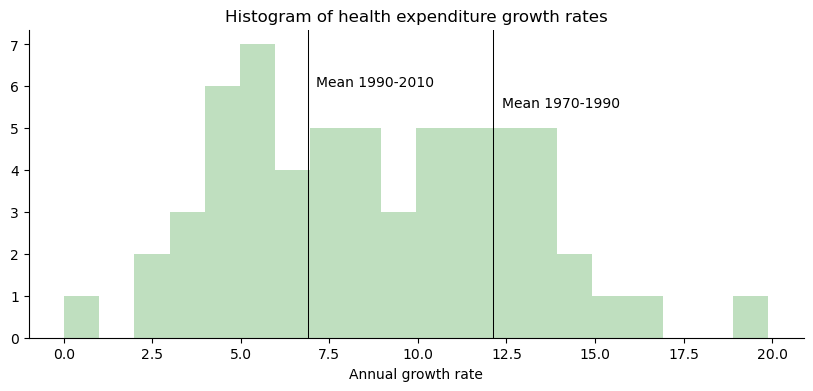

In [29]:
# Set a variable for plot color so I can change it everywhere easily
my_plot_color = 'green'

# I am using the figsize parameter here. It takes (width, height) in inches. 
fig, ax = plt.subplots(1, 1, figsize=(10,4))  # one row, two columns of axes

ax.hist(nhe['growth'].dropna(), bins=20, color=my_plot_color, alpha=0.25)        
ax.set_xlabel('Annual growth rate')
ax.set_title('Histogram of health expenditure growth rates')

# Add a vertical line at the mean
ax.axvline(x=early_mean, color='black', linewidth=0.75)  
ax.axvline(x=later_mean, color='black', linewidth=0.75)  

# Put text on the figure. 
ax.text(later_mean + .25, 6, 'Mean 1990-2010')            # text(x, y, string)
ax.text(early_mean + .25, 5.5, 'Mean 1970-1990')            # text(x, y, string)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('nhe_growth.pdf')
plt.show()

## Exercise 4: Assigning analysts

*Source:* This is a modification of a problem that Google often uses as a coding exam to recruit software engineers.

*Setup:* You are going to lead a team of analysts to summarize the determinants of health spending growth 1960-2019. Each team member will be responsible for a set of consecutive years to generate a report for the Biden administration. It's expensive to hire an analyst: each one receives a base salary of $\$50,000$, plus a bonus of $\$8,000$ per week of work. It is expected that if an analyst is given `Y` years of data to analyze, it will take her $$Y + 0.075*Y^2$$ weeks to complete the project. 

*How to assign years:* Each analyst will receive a "cut" of consecutive years to analyze. For example, if there are 6 team members, each team member will get a decade to analyze: 1960-1969, 1970-1979, 1980-1989, 1990-1999, 2000-2009, and 2010-2019. However, if there are 7 team members, you can't divide the years equally. This means you can't have a team of 7.

*Your task:* You don’t know how many teammates you’ll have, but you’re told there is a total pool of 10 analysts, including you, and you are expected to hire at least 4 of them. Your job is to find the number of analysts that has the lowest cost. For example, if there are 4 team members, each of whom is responsible for 15 years, the total cost is $4 \times (\$50,000 + \$8,000 \times (15 + 0.075 \times 15^2)) = \$1,220,000$. Not bad for a federal project!

You should write code to solve this problem. Here are the steps for the solution:

1. Create a list with the years 1960-2019: `[1960, 1961, …, 2018, 2019]`.

2. For each possible team size from 4-10 analysts, find the largest number of years you can analyze, from 1960-2019, with each analyst getting the same number of years. You should loop over team size possibilities and print out a nicely formatted answer like this: “If there are 6 team members, each team member will analyze 10 years.” If the years cannot be divided evenly, you don't need to print anything.

3. For the subset of team sizes for which you can evenly divide all of the years, calculate the cost of paying the team using the formula above. 

4. What is the cost-minimizing team structure? Use your coding skills and Python functions to keep track of the costs, find the minimum, and print out the optimal team size. Do not do this manually.

In [ ]:
# 1. Create a list of years
years = list(range(1960, 2020))
team_sizes = []
costs = []

# 2-3. Loop over analysts
for team_size in range(4, 11):
    # Check if years can be divided evenly
    if len(years) % team_size == 0:
        # Years per analyst and costs
        ypa = len(years) / team_size
        cost = team_size * (50000 + 8000 * (ypa + .075 * ypa**2))
        team_sizes.append(team_size)
        costs.append(cost)
        print("If there are {0} team members, each team member will analyze {1} years.".format(team_size, int(ypa)))
        print("A team size of {0} costs ${1:8,.2f}.".format(team_size, cost))

In [ ]:
# 4. Minimal cost
min_index = costs.index(min(costs))
print("The minimal cost is ${0:8,.2f} for a team of {1}.".format(costs[min_index], team_sizes[min_index]))

#### Below is an alternative solution using a written function to find the argmin

In [ ]:
# Part 1
years = list(range(1960, 2020))
nyears = len(years)

# Part 2
nsize = list(range(4, 11))
sizes = []
for size in nsize:
    if nyears%size == 0:
        print('If there are ', size, 'team members, each team will analyze', nyears//size, 'years.')
        sizes.append(size)
#print(sizes)

In [ ]:
# Part 3
costs = []
for size in sizes: 
    y = nyears//size
    costs.append(size*(50000 + 8000*(y + 0.075*(y**2))))

# Part 4
def argmin(lst):
  return lst.index(min(lst))
print('The cost minimizing number of team members is', nsize[argmin(costs)])